# Data wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import load
from numpy import save

import tensorflow as tf
from tensorflow import keras

Load the files and put them as dataframe

In [16]:
names=['gamma', 'electron', 'proton', 'helium', 'iron', 'nitrogen', 'silicon']
lista=[]
for i in range (7):
    lista.append(load('files/'+names[i]+'.npy'))
    lista[i]=pd.DataFrame(data=lista[i])

Now, proceed to normalize the data

In [17]:
events=np.empty((7))
for i in range (len(events)):
    events[i]=len(lista[i].groupby([0]).mean())
events=events.astype(int)

In [25]:
count=0
print('NUMERO DE EVENTOS')
for j in names:
    print(j,': ',events[count])
    count=count+1


NUMERO DE EVENTOS
gamma :  11999
electron :  2715
proton :  3697
helium :  3164
iron :  2095
nitrogen :  2134
silicon :  1890


In [18]:
#INTENSITIES <0 ARE SET TO 0
#REESCALE INTENSITIES FROM 0 TO 1
# INTENSITY max and min of all the particles
Imaximo=1458.8   
Iminimo=0

for i in range(7):
    lista[i].loc[(lista[i][3] <0),[3]]=0
    lista[i][3]= (lista[i][3] - Iminimo) / (Imaximo- Iminimo)

In [19]:
#DIVIDE NUMBER OF EVENTS BY 100 AND CONVERT IT TO INT
for i in range(7):
    lista[i][0] = (lista[i][0]/100).astype(int)

In [20]:
#reescale x,y
#X,Y min of every df
Xminimo=1823
Yminimo=7370
for i in range(7):
    lista[i][2]=lista[i][2]-Yminimo
    lista[i][1]=lista[i][1]-Xminimo

In [21]:
#REESCALE THE PIXELS AND CONVERT IT TO INT
for i in range(7):
    lista[i][1]=(round(lista[i][1]/333)).astype(int)
    lista[i][2]=(round(lista[i][2]/192)).astype(int)

The size of the images is 54x92

In [22]:
lista[0]

,0,1,2,3,4
0,1,27,46,0.003359,0.0
1,1,27,44,0.002811,0.0
2,1,28,45,0.000685,0.0
3,1,28,47,0.000617,0.0
4,1,27,48,0.000960,0.0
...,...,...,...,...,...
22258140,11999,47,76,0.000343,0.0
22258141,11999,47,78,0.001919,0.0
22258142,11999,46,79,0.000137,0.0
22258143,11999,45,78,0.000823,0.0


In [43]:
#convert to numpy
for i in range(7):
    lista[i]=lista[i].to_numpy()

In [11]:
#save the file
for i in range(7):
    print('file/'+names[i]+'_n.npy')
    save('file/'+names[i]+'_n.npy', lista[i])

file/gamma_n.npy
file/electron_n.npy
file/proton_n.npy
file/helium_n.npy
file/iron_n.npy
file/nitrogen_n.npy
file/silicon_n.npy


Now, create a file with the position of the pixel and its intensity

In [44]:
#create list
rows=1854
dat=[]
for i in range (7):
    dat.append(np.zeros((events[i],rows,3)))

In [45]:
%%time
#the number of rows of each event (for every particle)   
rows=1854
for i in range(7):
    df_n=lista[i][:,1:4]
    k=0
    for m in range (events[i]):
        for j in range (1854):
            dat[i][m][j]=df_n[k]  # df[[1,2,3]]
            k=k+1

Wall time: 1min 46s


In [39]:
# save to npy file    
for i in range(7):
    print('file/'+names[i]+'_np2.npy')
    save('file/'+names[i]+'_np2.npy', dat[i])

file/gamma_np2.npy
file/electron_np2.npy
file/proton_np2.npy
file/helium_np2.npy
file/iron_np2.npy
file/nitrogen_np2.npy
file/silicon_np2.npy


create a squared image to feed the nn

In [47]:
#CREATE A 3D MATRIX WITH: EVENTS, ROWS AND FEATURES
dset=[]
for i in range (7):
    dset.append(np.zeros((events[i],int(lista[i][:,1].max())+1,int(lista[i][:,2].max())+1)) )

In [18]:
for i in range(7):
    print(names[i])
    for m in range (events[i]): #esto lo hago para cada evento
        for j in range (1854): #para todos los pixeles del evento #voy por cada fila de la lista original
            a=int(dat[i][m][j][0]) #cojo la pos x
            b=int(dat[i][m][j][1]) #cojo la pos y
            dset[i][m][a,b]=dat[i][m][j][2]

gamma
electron
proton
helium
iron
nitrogen
silicon


In [55]:
#save the squared image
for i in range(7):
    print('file/'+names[i]+'_image.npy')
    save('file/'+names[i]+'_image.npy', dset[i])

file/gamma_image.npy
file/electron_image.npy
file/proton_image.npy
file/helium_image.npy
file/iron_image.npy
file/nitrogen_image.npy
file/silicon_image.npy


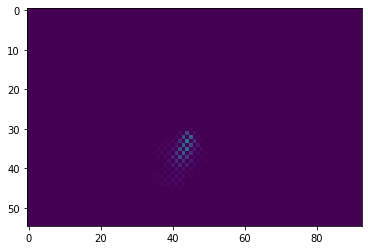

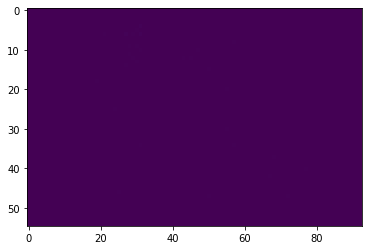

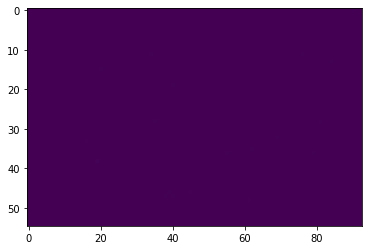

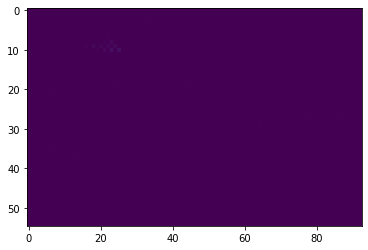

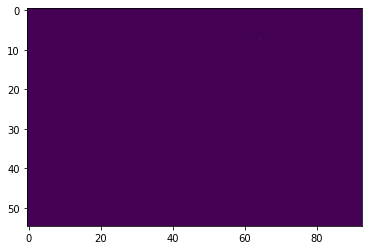

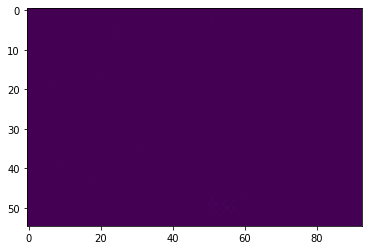

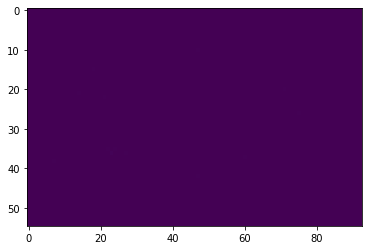

Wall time: 15.6 s


In [58]:
%%time
#Save the images
for k in range(7):
    for i in range (10):#(len(dset))
        plt.imshow(dset[k][i],cmap=plt.cm.binary, vmin=0, vmax=1)
        plt.savefig('file/'+names[k]+'{0}.png'.format(i)) #/'+names[k]+'

    plt.imshow(dset[k][1], interpolation='none',aspect='auto', vmin=0, vmax=1) #if vmin and vmax is removed, images with low intensities can be properly seen
    fig_size = plt.rcParams["figure.figsize"]
    plt.show()

# Gamma Shift

In [4]:
#load the files
df1 = load('file/gamma_n.npy')
df1 = pd.DataFrame(data=df1)

df = load('file/gamma_np2.npy')

In [ ]:
#histogram of activated pixels in axis x,y: useful to choose how much to move the images
plt.hist(df1.loc[df1[4] ==1][1], bins = 54)
plt.show()
plt.hist(df1.loc[df1[4] ==1][2], bins = 60)
plt.show()

According to the histograms, the activated pixels are often placed in (30,50) in the y-axis, and in (35,51) in the x-axis

In [5]:
print('mean value of background noise: ')
print(df1.loc[df1[4] ==0].groupby([0]).mean()[3].mean())
print('standard deviation of background noise: ')
print(df1.loc[df1[4] ==0].groupby([0]).mean()[3].std())

print('mean value of activated pixels: ')
print(df1.loc[df1[4] ==1].groupby([0]).mean()[3].mean())
print('standard deviation of activated pixels: ')
print(df1.loc[df1[4] ==1].groupby([0]).mean()[3].std())

mean value of background noise: 
0.0014718569513040357
standard deviation of background noise: 
0.00021087455654016432
mean value of activated pixels: 
0.08981926808665298
standard deviation of activated pixels: 
0.022311290197624418


In [5]:
#A dataset with the background noise is created
conjunto=df1.loc[df1[4] ==0][3].values.copy()
import random
random.choice(conjunto)

0.0019193857965451055

steps to follow:

1.-Randomly choose a value to move left/right and up/down, taking into account the values where the activated pixels are, so that they dont go out of the image. 

2.-Move the image in that direction

3.-Fill the rest with noise


In [ ]:
%%time
#create a squared image to feed to the neural network
dseta=np.zeros((11999,int(df[0][:,0].max())+1,int(df[0][:,1].max())+1)) #for the original image (to compare original and shifted images)
dsetb=np.zeros((11999,int(df[0][:,0].max())+1,int(df[0][:,1].max())+1)) #for the shifted image

for m in range (11999): #for each event 
    print('evento: ',m)
    random1=int(random.uniform(0, 2))#to choose left or right
    random2=int(random.uniform(0, 2))#to choose up or down

    if (random1==0): #SHIFT IMAGE ON THE LEFT
        
        if (random2==0): #SHIFT IMAGE ON THE LEFT UP
            p=int(random.uniform(0, 30)) #how many pixels to move it
            for j in range (1854):
                a=int(df[m][j][0]) #take the x position from the original image
                b=int(df[m][j][1]) #take the y position from the original image
                dseta[m][a,b]=df[m][j][2] #assign it to the image not moved   

                #if the image is moved 3 pixels on the left, the three left most pixels colums are filled with noise.
                #check whether the pixel(a,b) belongs to the pixels to move or to fill with background noise
                if (b<55-p):  # pixel(a,b) belongs to the pixels to move
                    k=0
                    try:
                        c=np.where((df[m][:,0]==a+p) & (df[m][:,1]==b+p))[0][0] #take the point from the especified position in the original image
                        k=1
                    except:
                        pass

                    #try/except in case a point is not found (for example, it is out of the hexagon) and therefore the program raises error, and if it happens, a point from noise data is assigned
                    if (k==1):
                        dsetb[m][a,b]=df[m][c][2]
                    else:
                        dsetb[m][a,b]=random.choice(conjunto)

                else:# pixel(a,b) belongs to the pixels to fill with background noise
                    dsetb[m][a,b]=random.choice(conjunto)
            
        else: #SHIFT IMAGE ON THE LEFT DOWN (same structure as above)
            p=int(random.uniform(0, 8))
            for j in range (1854):
                a=int(df[m][j][0]) 
                b=int(df[m][j][1]) 
                dseta[m][a,b]=df[m][j][2] 

                if (b<93-p): 
                    k=0
                    try:
                        c=np.where((df[m][:,0]==a-p) & (df[m][:,1]==b+p))[0][0] #take the point from the especified position in the original image
                        k=1
                    except:
                        pass
                    
                    if (k==1):
                        dsetb[m][a,b]=df[m][c][2]
                    else:
                        dsetb[m][a,b]=random.choice(conjunto)

                else:
                    dsetb[m][a,b]=random.choice(conjunto)
    
    
    
    else: #SHIFT IMAGE ON THE RIGHT
        
        if (random2==0): #SHIFT IMAGE ON THE RIGHT DOWN
            p=int(random.uniform(0, 10))
            for j in range (1854):
                a=int(df[m][j][0]) 
                b=int(df[m][j][1]) 
                dseta[m][a,b]=df[m][j][2]   
                
                if (b>p): 
                    k=0
                    try:
                        c=np.where((df[m][:,0]==a-p) & (df[m][:,1]==b-p))[0][0] #take the point from the especified position in the original image
                        k=1
                    except:
                        pass

                    if (k==1):
                        dsetb[m][a,b]=df[m][c][2]
                    else:
                        dsetb[m][a,b]=random.choice(conjunto)

                else:
                    dsetb[m][a,b]=random.choice(conjunto)
            
        else: #SHIFT IMAGE ON THE RIGHT UP
            p=int(random.uniform(0, 30))
            for j in range (1854):
                a=int(df[m][j][0]) 
                b=int(df[m][j][1]) 
                dseta[m][a,b]=df[m][j][2]  

                if (b>p): 
                    k=0
                    try:
                        c=np.where((df[m][:,0]==a+p) & (df[m][:,1]==b-p))[0][0] #take the point from the especified position in the original image
                        k=1
                    except:
                        pass

                    if (k==1):
                        dsetb[m][a,b]=df[m][c][2]
                    else:
                        dsetb[m][a,b]=random.choice(conjunto)

                else:
                    dsetb[m][a,b]=random.choice(conjunto)

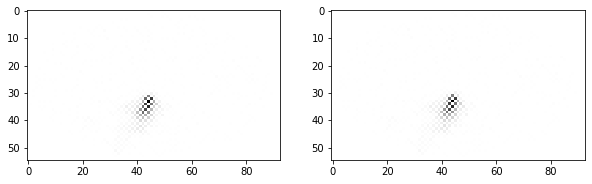

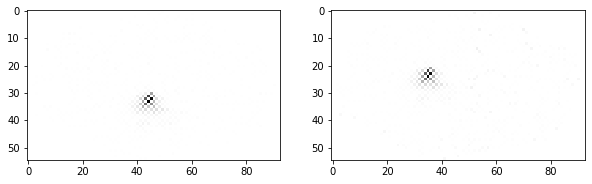

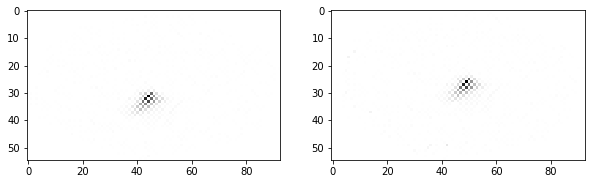

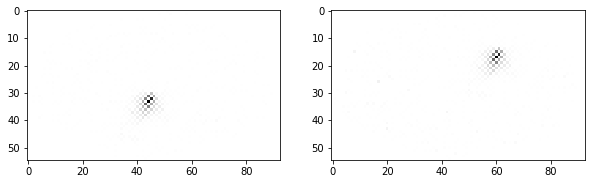

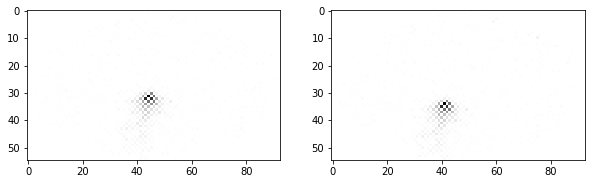

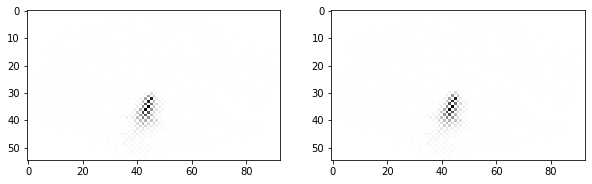

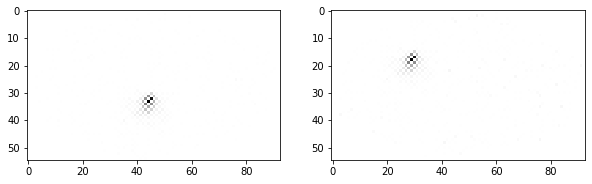

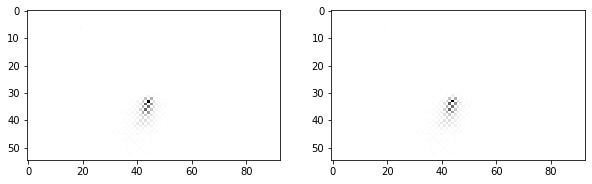

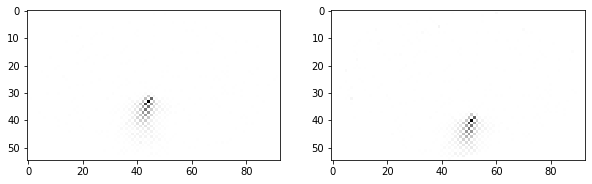

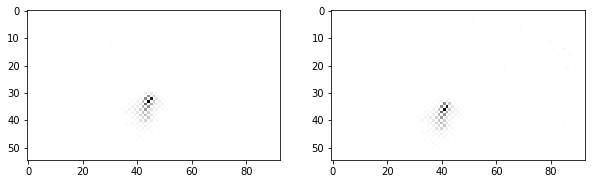

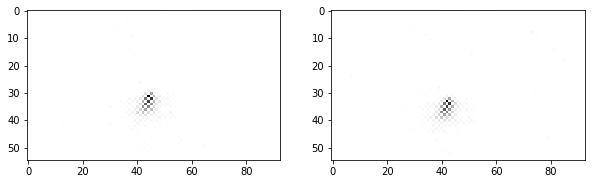

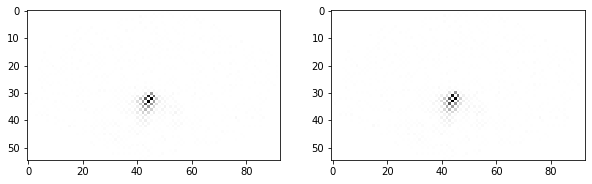

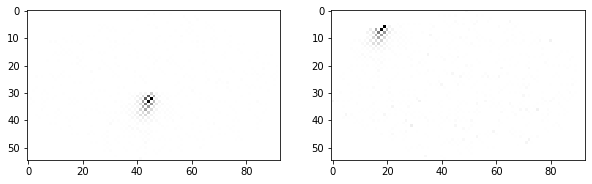

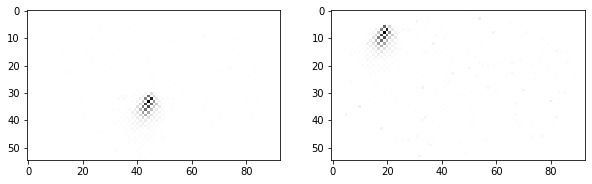

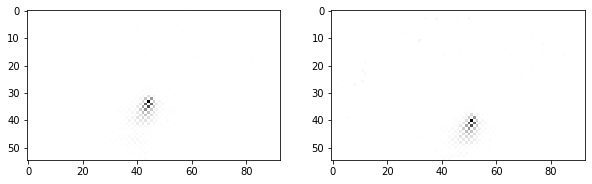

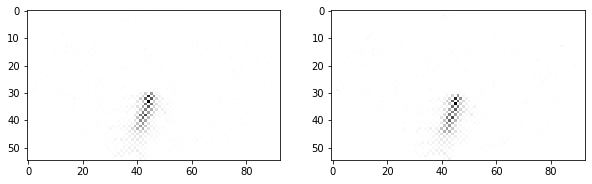

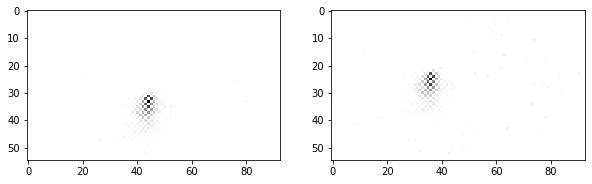

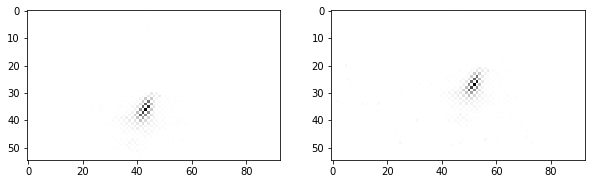

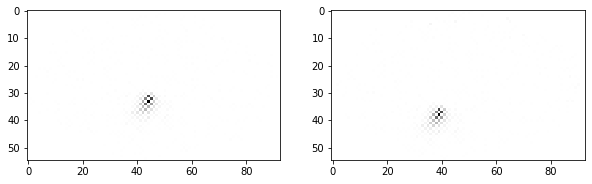

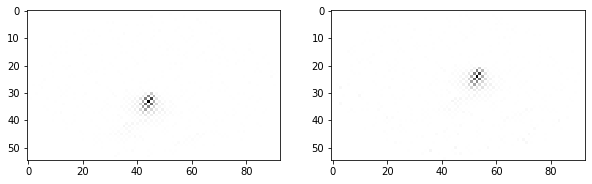

In [313]:
#original vs shifted image
for i in range(20):
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.imshow(dseta[i],cmap=plt.cm.binary)
    plt.subplot(2,2,2)
    plt.imshow(dsetb[i],cmap=plt.cm.binary)
    plt.show()

In [7]:
save('file/gamma_image_moved.npy', dsetb) #save the images

In [ ]:
%%time
#Save the images
for i in range (100):#(len(dset))
    plt.imshow(dsetb[i],cmap=plt.cm.binary, vmin=0, vmax=1)
    plt.savefig("images/gamma_moved/gamma{0}.png".format(i)) 

# PLOTS: all the particles

In [2]:
names=['gamma', 'electron', 'proton', 'helium', 'iron', 'nitrogen', 'silicon']
lista=[]
for i in range (7):
    lista.append(load('files/'+names[i]+'_n.npy'))
    lista[i]=pd.DataFrame(data=lista[i])

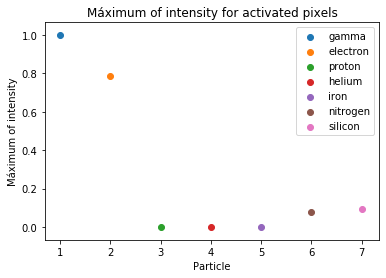

In [3]:
plt.title('Máximum of intensity for activated pixels')
contador=1
for i,j in zip(lista,names):
    plt.scatter(contador, i[i[4]==1][3].values.max(), label=j)
    contador=contador+1
    
plt.xlabel('Particle')
plt.ylabel('Máximum of intensity')
plt.legend(loc="upper right")
plt.show()

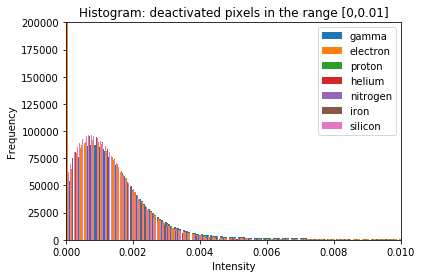

Wall time: 24.1 s


In [340]:
%%time
bins=1000

for i,j in zip(lista,names):
    plt.hist(i.loc[i[4] ==0][3][:3500000], bins = bins, label=j)

plt.title('Histogram: deactivated pixels in the range [0,0.01]')
plt.legend(loc="upper right")
plt.ylim(0,200000)
plt.xlim(0,0.01)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

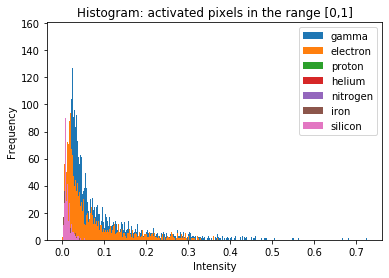

Wall time: 21.4 s


In [341]:
%%time
bins=1000

for i,j in zip(lista,names):
#     plt.hist(i[:1000000,3], label=j, bins = bins)
    plt.hist(i.loc[i[4] ==1][3][:7500], bins = bins, label=j)

plt.title('Histogram: activated pixels in the range [0,1]')
plt.legend(loc="upper right")
# plt.ylim(0,30000)
# plt.xlim(0,0.01)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

# PLOTS: gamma vs electron

In [51]:
df1 = load('file/gamma_n.npy')
df2= load('file/electron_n.npy')
df1 = pd.DataFrame(data=df1)
df2 = pd.DataFrame(data=df2)
df1=df1.sample(frac=1).reset_index(drop=True) #barajo gamma para que no haya problema al coger una cierta cantidad de datos de gamma


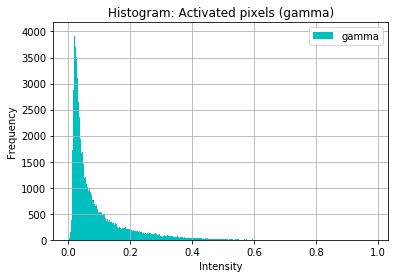

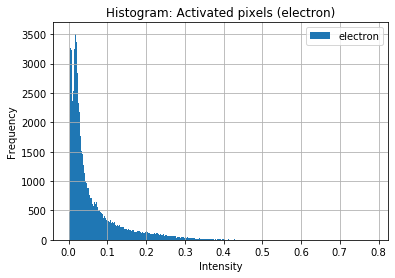

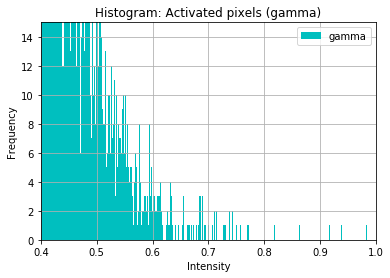

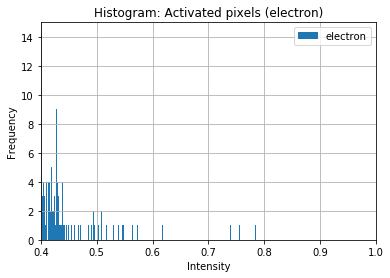

In [55]:
bins=500
plt.hist(df1.loc[df1[4] ==1][3][:100818], bins = bins,color='c', label='gamma')
plt.title('Histograma: Intensidad') 
plt.legend(loc="upper right")
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram: Activated pixels (gamma)') 
plt.grid(True)
plt.show()

plt.hist(df2.loc[df2[4] ==1][3][:100818], bins = bins, label='electron')
plt.title('Histogram: Intensity') 
plt.legend(loc="upper right")
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram: Activated pixels (electron)') 
plt.grid(True)
plt.show()



plt.hist(df1.loc[df1[4] ==1][3][:100818], bins = bins,color='c', label='gamma')
plt.title('Histograma: Intensidad') 
plt.legend(loc="upper right")
plt.xlim(0.4,1)
plt.ylim(0,15)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram: Activated pixels (gamma)') 
plt.grid(True)
plt.show()

plt.hist(df2.loc[df2[4] ==1][3][:100818], bins = bins, label='electron')
plt.title('Histogram: Intensity') 
plt.legend(loc="upper right")
plt.xlim(0.4,1)
plt.ylim(0,15)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram: Activated pixels (electron)') 
plt.grid(True)
plt.show()